In [26]:
import os
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from pathlib import Path

In [27]:
def read_json_file(json_file):
    with open(json_file) as f:
        data = json.load(f)
    return data


def get_zeros(data):
    zeros = []
    for i in range(len(data["scores"])):
        if data["scores"][i]["label"] == 0:
            zeros.append(data["scores"][i]["score"])
    return zeros

def get_ones(data):
    ones = []
    for i in range(len(data["scores"])):
        if data["scores"][i]["label"] == 1:
            ones.append(data["scores"][i]["score"])
    return ones

def get_labels(data):
    labels = []
    for i in range(len(data["scores"])):
        labels.append(data["scores"][i]["label"])
    return labels

In [28]:
def plot_scores(stats_dir):
    stats_files = [str(p) for p in Path(stats_dir).rglob("*.json")]
    num_rows = int(np.ceil(len(stats_files) / 3))

    for i, filename in enumerate(stats_files):
        data = read_json_file(filename)
        zeros = get_zeros(data)
        ones = get_ones(data)
        title = filename.split(".")[0]

        mean_zeros = np.mean(zeros)
        mean_ones = np.mean(ones)
        std_zeros = np.std(zeros)
        std_ones = np.std(ones)

        step = len(zeros)
        x = np.linspace(0, 1, step)

        pdf_zeros = norm.pdf(x, mean_zeros, std_zeros)
        pdf_ones = norm.pdf(x, mean_ones, std_ones)
        idx = np.argwhere(np.diff(np.sign(pdf_zeros - pdf_ones))).flatten()

        sns.set_context("paper")
        sns.set_palette("Set2")

        plt.suptitle("Trained and Tested on Replay", fontsize=16)
        plt.rcParams["figure.figsize"] = (20, 10)
        plt.subplots_adjust(wspace=0.25, hspace=0.25)
        plt.subplot(num_rows, 3, i + 1, title=title, xlabel="scores")
    
        sns.distplot(zeros, hist=False, kde=True, kde_kws={"shade": True, "linewidth": 2})
        sns.distplot(ones, hist=False, kde=True, kde_kws={"shade": True, "linewidth": 2})

        plt.axvline(x=x[idx], color="black", linestyle="--", linewidth=1)
        plt.text(x[idx] + 0.01, 2, f"th_eer={x[idx][0]:.3f}", rotation=90, fontsize=10)

        plt.legend(["Spoof", "Real"], loc="upper right", fontsize=10)

        if "test" in filename:
            plt.title(f"test, eer={data['m_eer']:.3f}, acc={data['m_acc']:.3f}", fontsize=10)
        else:
            epoch = os.path.basename(filename).split(".")[0]
            plt.title(f"train, {epoch}, eer={data['m_eer']:.3f}, acc={data['m_acc']:.3f}", fontsize=10)

    plt.savefig(f"{stats_dir}/plots.png")

/tmp/ipykernel_43576/3940034295.py:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(zeros, hist=False, kde=True, kde_kws={"shade": True, "linewidth": 2})
/home/o-ozoglu/.pyenv/versions/3.10.4/envs/spoof/lib/python3.10/site-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/tmp/ipykernel_43576/3940034295.py:32: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use 

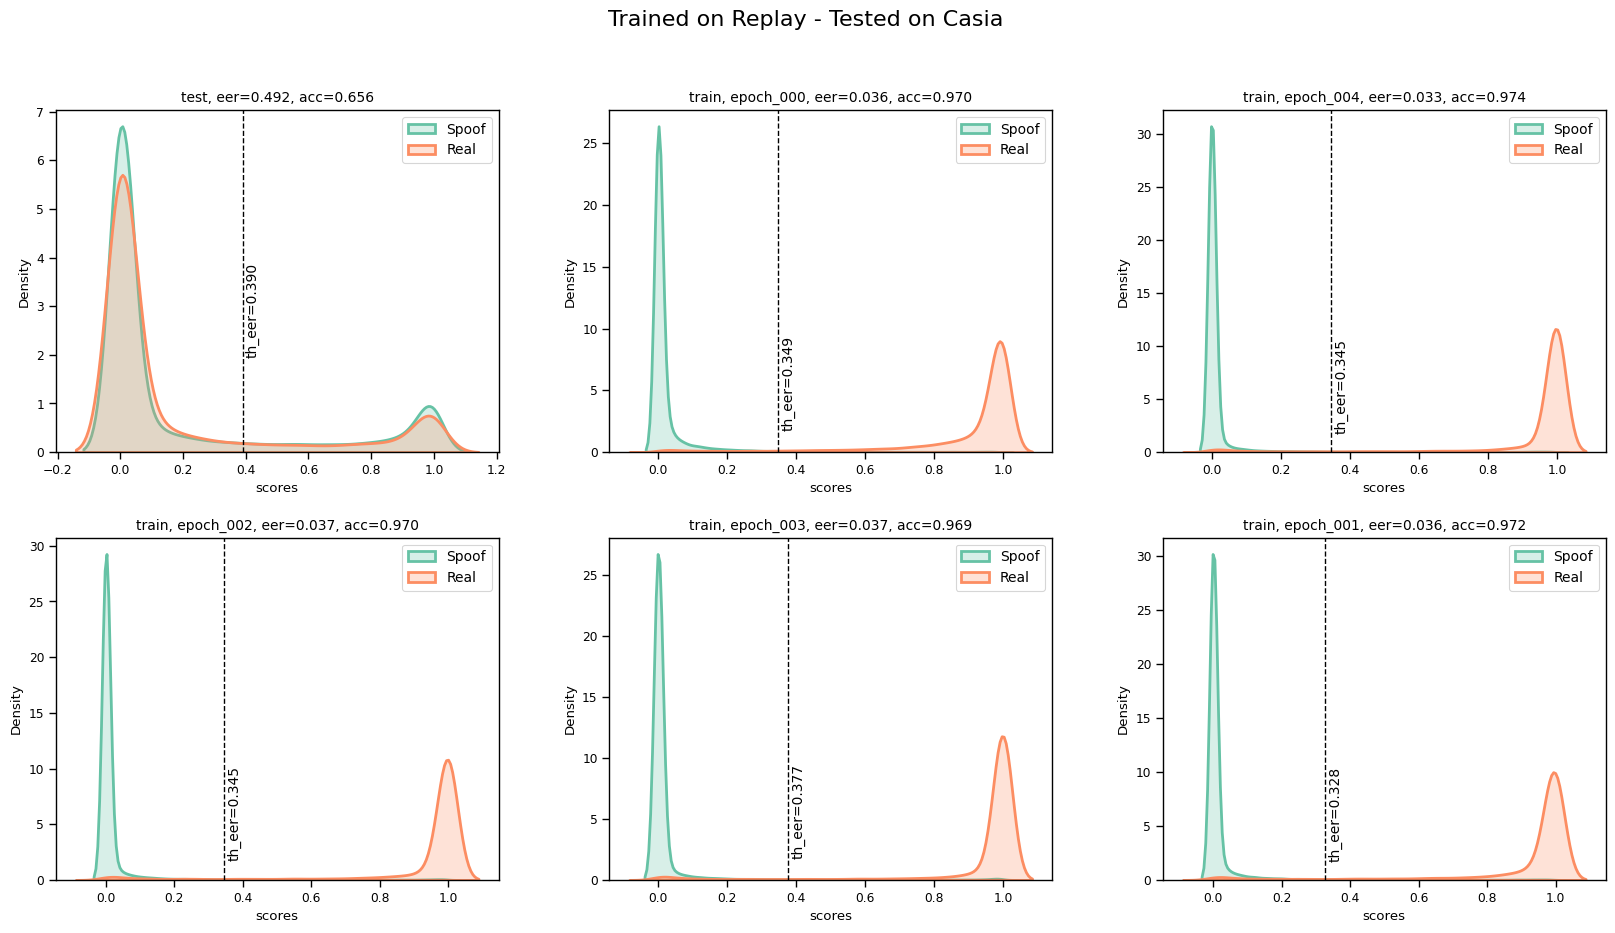

In [29]:
stats_dir = "../logs/stats"
plot_scores(stats_dir)